# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the data

In [2]:
data = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Let's check the data informations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

It seems there are alot of missing Data let's begin by some Data Cleaning

# Data Cleaning

In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data["Life expectancy "].fillna(data["Life expectancy "].mean(),inplace=True)
data["Adult Mortality"].fillna(data["Adult Mortality"].mean(),inplace=True)
data["Alcohol"].fillna(data["Alcohol"].mean(),inplace=True)
data["Hepatitis B"].fillna(data["Hepatitis B"].mean(),inplace=True)
data[" BMI "].fillna(data[" BMI "].mean(),inplace=True)
data["Polio"].fillna(data["Polio"].mean(),inplace=True)
data["Total expenditure"].fillna(data["Total expenditure"].mean(),inplace=True)
data["Diphtheria "].fillna(data["Diphtheria "].mean(),inplace=True)
data["Population"].fillna(round(data["Population"].mean(),ndigits=2),inplace=True)
data["GDP"].fillna(data["GDP"].mean(),inplace=True)
data[" thinness  1-19 years"].fillna(data[" thinness  1-19 years"].mean(),inplace=True)
data[" thinness 5-9 years"].fillna(data[" thinness 5-9 years"].mean(),inplace=True)
data["Income composition of resources"].fillna(data["Income composition of resources"].mean(),inplace=True)
data["Schooling"].fillna(data["Schooling"].mean(),inplace=True)

In [7]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

We can notice here that the column names have extra spacing let's fix that.

In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
data.rename(columns={c: c.strip() for c in data.columns.values.tolist()}, inplace=True)

In [10]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

That looks better now and the data has no missing values.

In [12]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Let's now do some EDA and Visualisation

In [13]:
# Let's make the correlation matrix
correlation_matrix= data.corr()
correlation_matrix

/tmp/ipykernel_32/4971877.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


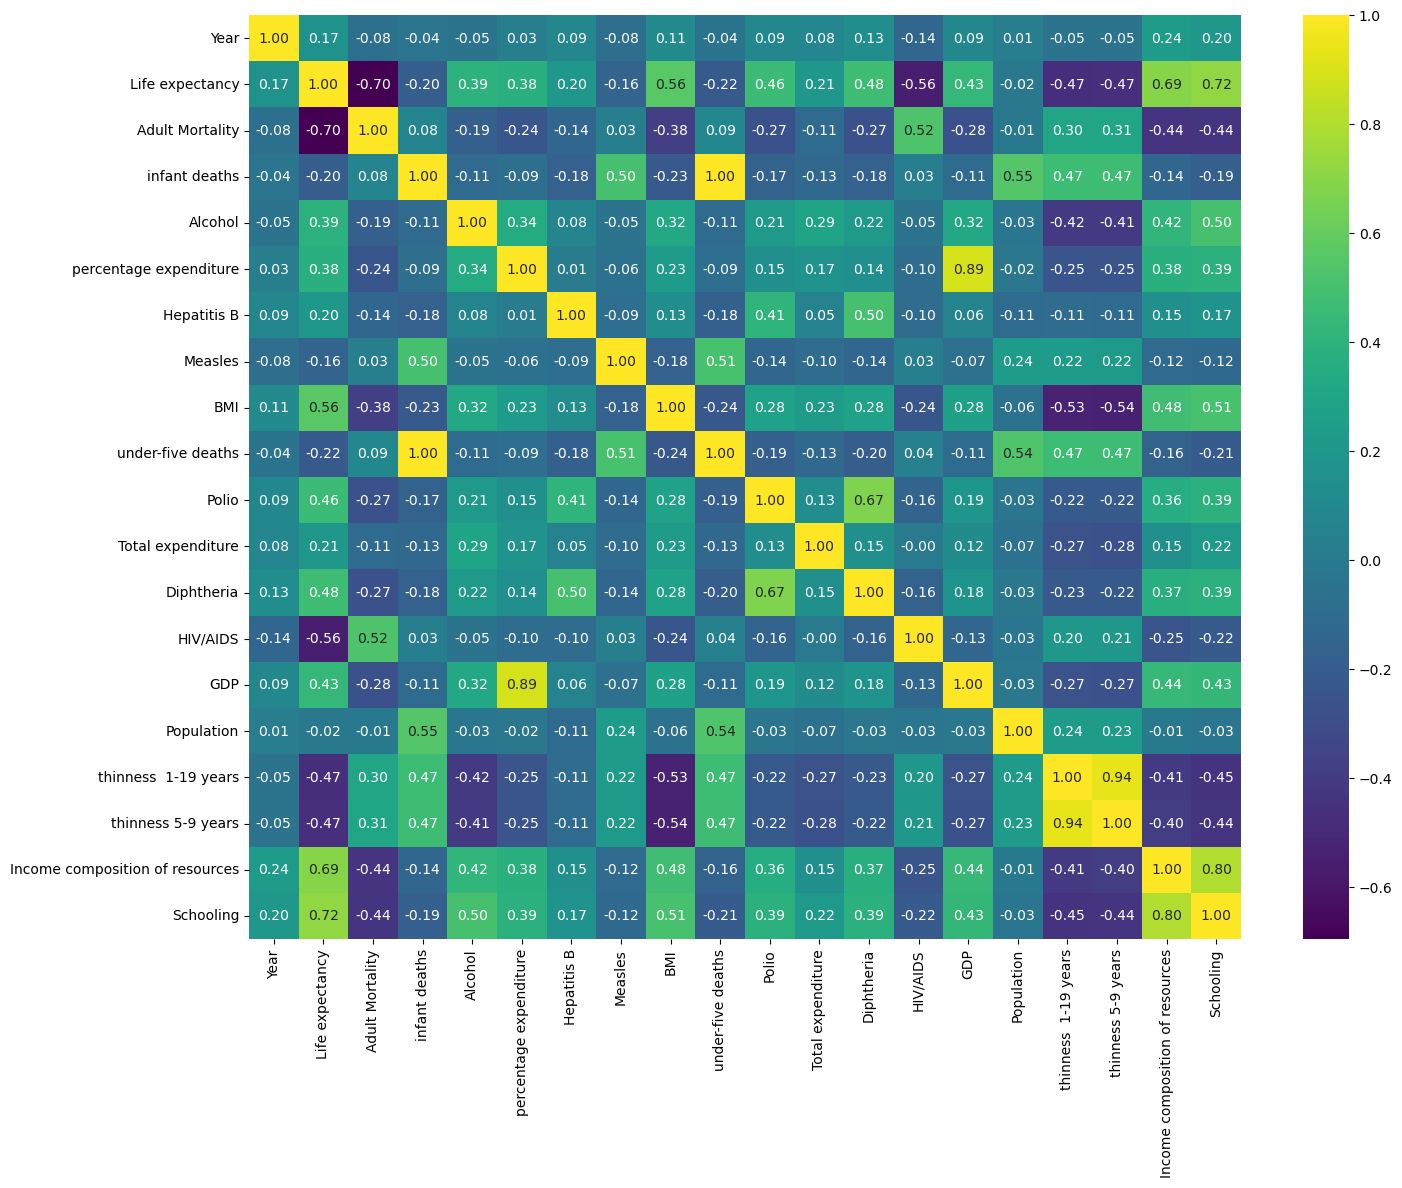

In [14]:
# Lets visulaise the correlation matrix with the help of heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="viridis")
plt.show()


It looks like "Under-five death" and "infant deaths" are the same columns since there correlation is = 1. so we can remove one of them.

In [15]:
data.drop("under-five deaths", axis=1, inplace=True)

**Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?**

Below I made a correlation comparison to answer this question and it seems to have a negative correlation except with schooling

In [16]:
LifeExpectancy_matrix= data[["Life expectancy","Alcohol","Schooling", "BMI", "Total expenditure"]].corr()
LifeExpectancy_matrix

,Life expectancy,Alcohol,Schooling,BMI,Total expenditure
Life expectancy,1.000000,0.391598,0.715066,0.559255,0.207981
Alcohol,0.391598,1.000000,0.497546,0.318070,0.294898
Schooling,0.715066,0.497546,1.000000,0.508105,0.218310
BMI,0.559255,0.318070,0.508105,1.000000,0.231814
Total expenditure,0.207981,0.294898,0.218310,0.231814,1.000000


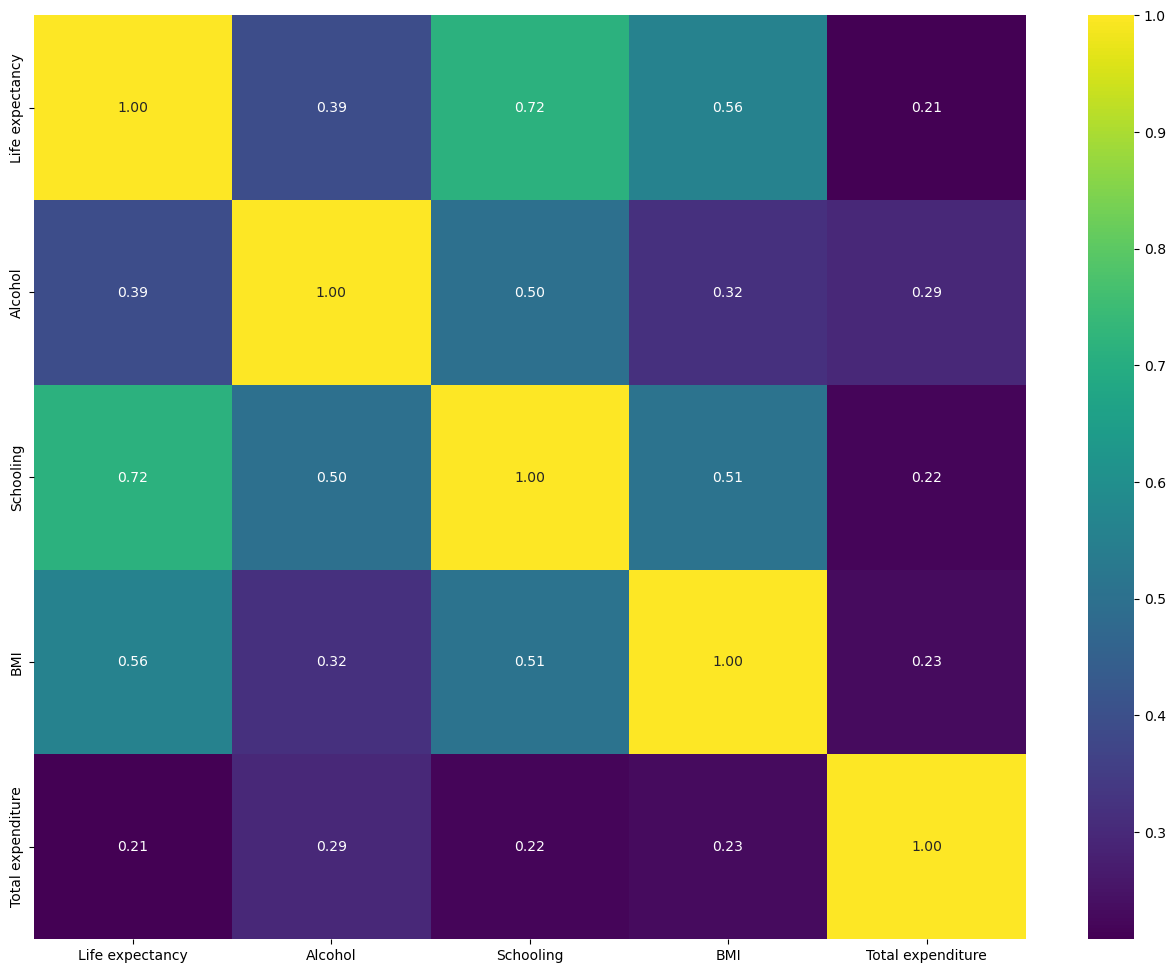

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(LifeExpectancy_matrix, annot=True,fmt=".2f", cmap="viridis")
plt.show()

Let's compare the life expectancy with the Status of the Countries

In [18]:
fig = px.violin(data, x="Status", y="Life expectancy",color=data["Status"])
fig.show()

Seems life the more Developed the country is the more life expectancy people have. That is obvious due to having a well organised country, advanced health industries, and better life styles.

In [19]:
fig = px.sunburst(data, path=['Year','Country'], values='Population',
                  color='Life expectancy',
                  color_continuous_scale='viridis',
                  color_continuous_midpoint=np.mean(data['Life expectancy']))
fig.show()

Below is the distribution curve of life expectancy.

In [20]:
fig = px.histogram(data, x="Life expectancy", marginal="box")
fig.show()

**How does Infant and Adult mortality rates affect life expectancy?**

As expected the more developed the country is the higher the life expectancy.


In [21]:
fig = px.scatter(data.sort_values("Life expectancy"), x="Adult Mortality", y="Life expectancy",color="Status")
fig.show()

In [22]:
fig = px.scatter(data.sort_values("Life expectancy"), x="infant deaths", y="Life expectancy",color="Status")
fig.show()

**What is the impact of schooling on the lifespan of humans?**

The graph below shows that the more educated people are the higher their life expectancy is.

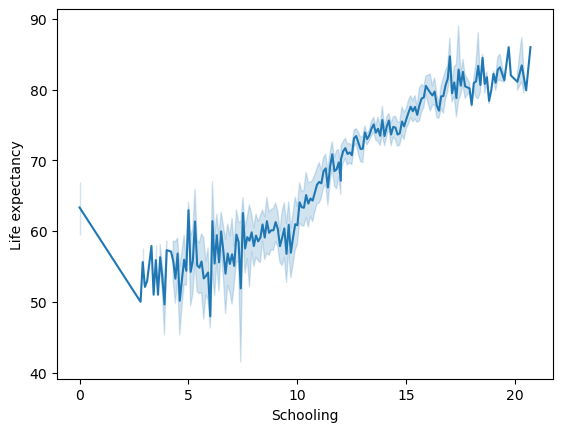

In [23]:
sns.lineplot(data, x="Schooling", y="Life expectancy");

**Does Life Expectancy have positive or negative relationship with drinking alcohol?**

It seems that Life Expectancy have None to negative relationship with drinking alcohol. One reason would be have a low correlation with life expectancy from the previous heatmap graph and another would be that both developed and developing countries with Alcohol recorded per capita 5 to 10 consumption in litres of pure alcohol and life expectancy between 70 and 80 whether the country drinks alcohol or not, seems to be not applicable.

In [24]:
fig = px.scatter(data, x="Alcohol", y= "Life expectancy", color="Status")
fig.show()

**Do densely populated countries tend to have lower life expectancy?**

As of 2015 and After the analysis of 2 countries China and USA, One being densely populated, densely populated countries doesn't seem to have lower life expectancy.


In [25]:
data[data["Country"] == "China"].describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,74.262500,73.750000,294.875000,4.208304,73.583763,80.437500,65857.937500,21.806250,93.687500,4.981762,93.312500,0.1,2345.303158,3.218121e+05,4.637500,4.025000,0.660250,11.437500
std,4.760952,1.318016,37.037819,104.675292,1.231684,82.433865,30.644127,37652.333984,9.828901,5.985747,0.491540,6.052203,0.0,2389.807664,4.892337e+05,0.732006,0.726177,0.049167,1.372528
min,2000.000000,71.700000,11.000000,157.000000,2.840000,0.000000,6.000000,6183.000000,2.500000,86.000000,4.320000,85.000000,0.1,153.182400,1.284000e+03,3.600000,2.900000,0.583000,9.500000
25%,2003.750000,73.400000,67.750000,211.500000,3.020000,13.161867,78.000000,41310.500000,21.725000,87.000000,4.597500,86.750000,0.1,697.460077,9.873175e+04,4.050000,3.450000,0.619000,10.125000
50%,2007.500000,74.450000,90.000000,275.500000,4.075000,44.754293,93.500000,64445.000000,24.500000,96.500000,4.805000,95.000000,0.1,1218.614312,1.340940e+05,4.600000,4.050000,0.665500,11.650000
75%,2011.250000,75.250000,96.250000,367.750000,5.657500,107.237874,99.000000,91622.000000,27.500000,99.000000,5.322500,99.000000,0.1,3563.044233,1.366008e+05,5.150000,4.625000,0.700750,12.550000
max,2015.000000,76.100000,115.000000,490.000000,5.790000,312.662482,99.000000,131441.000000,32.900000,99.000000,5.938190,99.000000,0.1,7683.523800,1.324655e+06,5.900000,5.100000,0.734000,13.500000


In [26]:
data[data["Country"] == "United States of America"].describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.00,16.000000,16.00000,16.000000,16.000000
mean,2007.500000,78.062500,58.187500,26.187500,8.330804,0.0,81.375000,130.625000,58.450000,82.125000,15.243012,95.125000,0.1,7483.158469,12753375.12,0.731250,0.60625,0.627551,11.992793
std,4.760952,0.832566,50.352383,2.040221,1.014257,0.0,28.291047,154.559104,20.417999,28.570089,2.775445,0.885061,0.0,0.000000,0.00,0.047871,0.02500,0.000000,0.000000
min,2000.000000,76.800000,11.000000,23.000000,4.602861,0.0,9.000000,37.000000,6.100000,9.000000,5.938190,94.000000,0.1,7483.158469,12753375.12,0.700000,0.60000,0.627551,11.992793
25%,2003.750000,77.425000,15.750000,24.750000,8.382500,0.0,90.500000,55.000000,62.925000,91.750000,14.992500,94.000000,0.1,7483.158469,12753375.12,0.700000,0.60000,0.627551,11.992793
50%,2007.500000,78.150000,18.000000,27.000000,8.590000,0.0,92.000000,68.500000,65.400000,93.000000,15.585000,95.000000,0.1,7483.158469,12753375.12,0.700000,0.60000,0.627551,11.992793
75%,2011.250000,78.725000,113.250000,28.000000,8.740000,0.0,92.250000,151.750000,67.625000,93.000000,17.035000,96.000000,0.1,7483.158469,12753375.12,0.800000,0.60000,0.627551,11.992793
max,2015.000000,79.300000,115.000000,28.000000,8.820000,0.0,94.000000,667.000000,69.600000,94.000000,17.600000,96.000000,0.1,7483.158469,12753375.12,0.800000,0.70000,0.627551,11.992793


In [27]:
fig = px.scatter(data, x="Population",y="Life expectancy", color="Status")
fig.show()

**Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?**

After analysis of the graphs below, increasing healthcare expenditure does not seem to improve its average lifespan, there is another factor as shown with a country being developed or not.


In [28]:
fig = px.scatter(data, x="Total expenditure",y="Life expectancy", color="Status")
fig.show()

In [29]:
new_df = data[data["Life expectancy"] < 65]
new_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [30]:
fig = px.scatter(new_df, x="Total expenditure", y= "Life expectancy")
fig.show()

**What is the impact of Immunization coverage on life Expectancy?**

As expected the more Immunization coverage is the higher the life expectancy is. The more protected and educated the people are on their own health the higher their life expectancy is. 

In [31]:
fig = px.scatter(data[data["Year"]==2015], x="Polio", y= "Life expectancy", color="Polio", size="Polio")
fig.show()

**Does various predicting factors which has been chosen initially really affect the Life expectancy?**

I left this Question for the last because it is Important to understand which factors actually affect thhe life expectancy.
After the EDA i can conclude that there must be other factors to study inorder to increase the life expectancy.

**What are the predicting variables actually affecting the life expectancy?**

Lets get the feature importance after we conduct some ML model to specify which variables actually affecting the life expectancy in this data.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
new_trans_df = data.copy()

In [34]:
new_trans_df.drop("Status", axis=1, inplace=True)

In [35]:
X = new_trans_df.drop(["Life expectancy"], axis=1)

y = new_trans_df["Life expectancy"]

X.shape, y.shape

((2938, 19), (2938,))

In [36]:
le = LabelEncoder()
X['encoded_country'] = le.fit_transform(X['Country'])
X

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,encoded_country
0,Afghanistan,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,192
2934,Zimbabwe,2003,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,192
2935,Zimbabwe,2002,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,192
2936,Zimbabwe,2001,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,192


In [37]:
X.drop("Country", axis=1, inplace=True)

In [38]:
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,encoded_country
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,192
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,192
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,192
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,192


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 19), (588, 19), (2350,), (588,))

In [42]:
RF = RandomForestRegressor(random_state=42)

RF.fit(X_train, y_train)

RF.score(X_test, y_test)

0.968349635376818

In [46]:
y_pred = RF.predict(X_test)
y_pred

array([73.226     , 76.122     , 74.892     , 76.081     , 53.258     ,
       51.831     , 65.989     , 73.733     , 76.655     , 55.329     ,
       52.68      , 52.357     , 57.731     , 74.076     , 69.28724932,
       62.231     , 57.897     , 79.177     , 69.575     , 79.082     ,
       81.026     , 84.797     , 72.53024932, 68.83999727, 71.0474959 ,
       68.321     , 55.315     , 65.515     , 82.254     , 74.009     ,
       67.359     , 73.973     , 73.706     , 71.733     , 78.647     ,
       48.683     , 59.49      , 71.93049863, 64.097     , 73.781     ,
       55.244     , 60.107     , 75.495     , 81.161     , 76.568     ,
       47.808     , 80.15      , 74.452     , 60.209     , 72.6       ,
       53.315     , 71.938     , 82.018     , 81.091     , 74.424     ,
       58.451     , 73.285     , 74.869     , 63.692     , 69.71      ,
       78.368     , 54.966     , 74.281     , 72.406     , 52.485     ,
       53.775     , 52.5       , 76.694     , 60.164     , 71.60

In [45]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.0561696254321422
2.7420381033499557


1.655910052916509

seems our model has done well. now lets get the feature importance

# Feature importance

In [50]:
len(RF.feature_importances_)

19

In [52]:
def plot_features(columns, importances, n=19):
    df = (pd.DataFrame({"feature": columns,
                        "feature_importance": importances})
         .sort_values("feature_importance", ascending=False)
         .reset_index(drop=True))
    
    #plot
    fig, ax = plt.subplots()
    ax.barh(df["feature"][:n], df["feature_importance"][:19])
    ax.set_ylabel("feature")
    ax.set_xlabel("feature importance")
    ax.invert_yaxis()

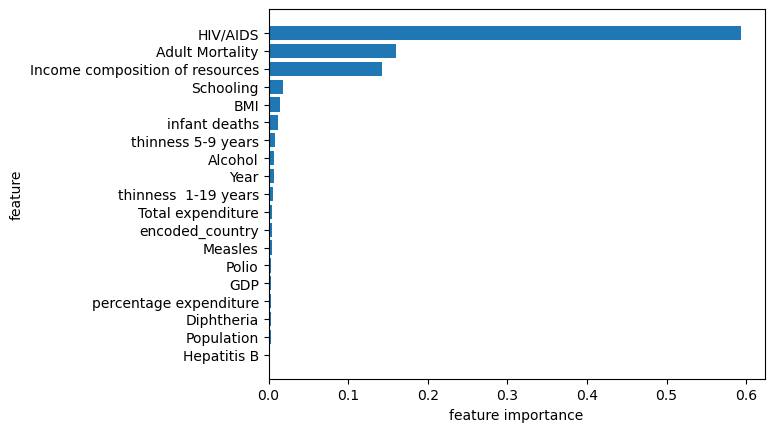

In [53]:
plot_features(X_train.columns, RF.feature_importances_)

# conclusion

We need to focus more on the health factors and life style inorder to get a better understanding and results on Life expectancy.


That is the end of this project i hope you enjoyed it and please make some comments and see if i can improve more on other parts.